In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sys



import sklearn.metrics as metrics

import argparse
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore')
import seaborn as sns
from scipy.stats import ranksums

from scipy.stats import levene, ttest_ind
import os
from scipy import stats
from scipy.spatial import distance
from scipy.stats import wilcoxon

In [4]:
folder_dir = '../dataset/3.preprocessed/'

list_data = os.listdir(folder_dir)
print(list_data)

['.ipynb_checkpoints', 'generated_1', 'generated_2', 'generated_3', 'preprocessing.ipynb', 'real_1_DR', 'real_2_TS', 'real_3_HT', 'real_4_MS']


In [5]:
def pvalue_percentage(feature_importance_array):
    average_importance = np.average(np.abs(feature_importance_array),axis=0)
    from_top_importance = feature_importance_array[:,average_importance.argsort()[::-1]]
    pvalue_list = np.array([])
    for rank_index in range(average_importance.shape[0]-1):
        
        former_array = from_top_importance[:,rank_index]
        latter_array = from_top_importance[:,rank_index+1]
        
        
        pvalue = wilcoxon(former_array,latter_array).pvalue
        
        
#         #paired samples t-test
#         if stats.shapiro(former_array).pvalue>0.05 and stats.shapiro(latter_array).pvalue>0.05:
            
            
# #             var_test_pvalue= levene(former_array,latter_array).pvalue
# #             if var_test_pvalue>0.05:
# #                 pvalue = stats.ttest_rel(former_array,latter_array, equal_var=True).pvalue
# #             else:
                
#             pvalue = stats.ttest_rel(former_array,latter_array).pvalue

#         else: # Wilcoxon signed rank test
            
#             pvalue = ranksums(former_array,latter_array).pvalue

        pvalue_list = np.append(pvalue_list,pvalue)
    return np.round(100*np.sum(pvalue_list<0.05)/pvalue_list.shape[0],1)

generated_1


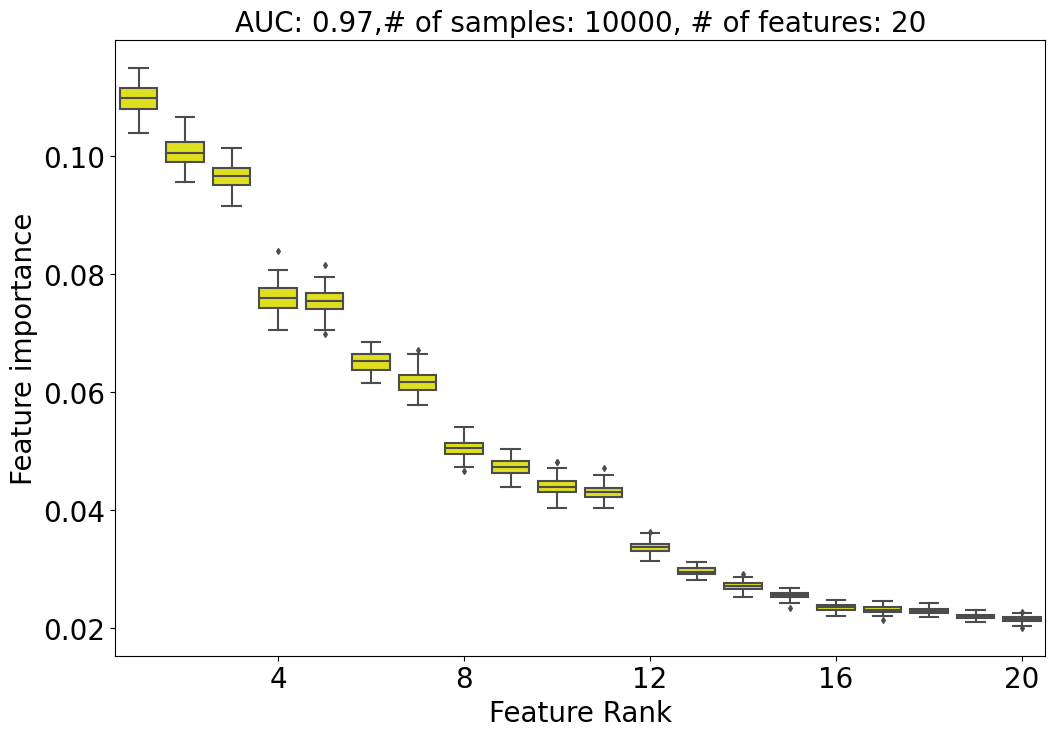

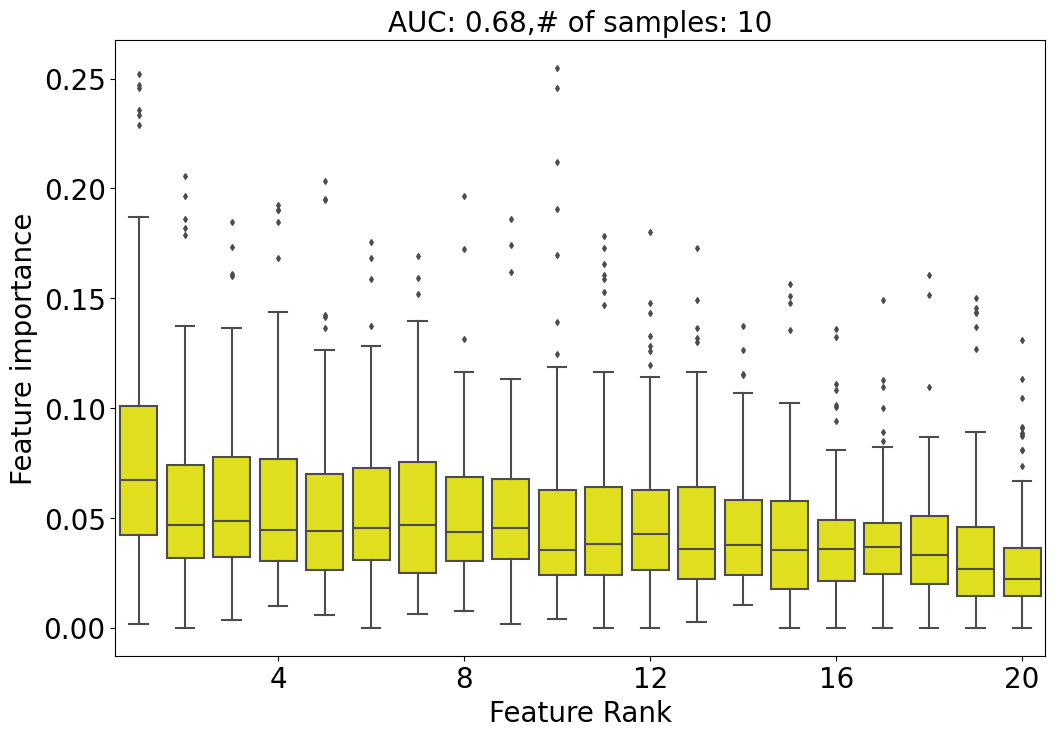

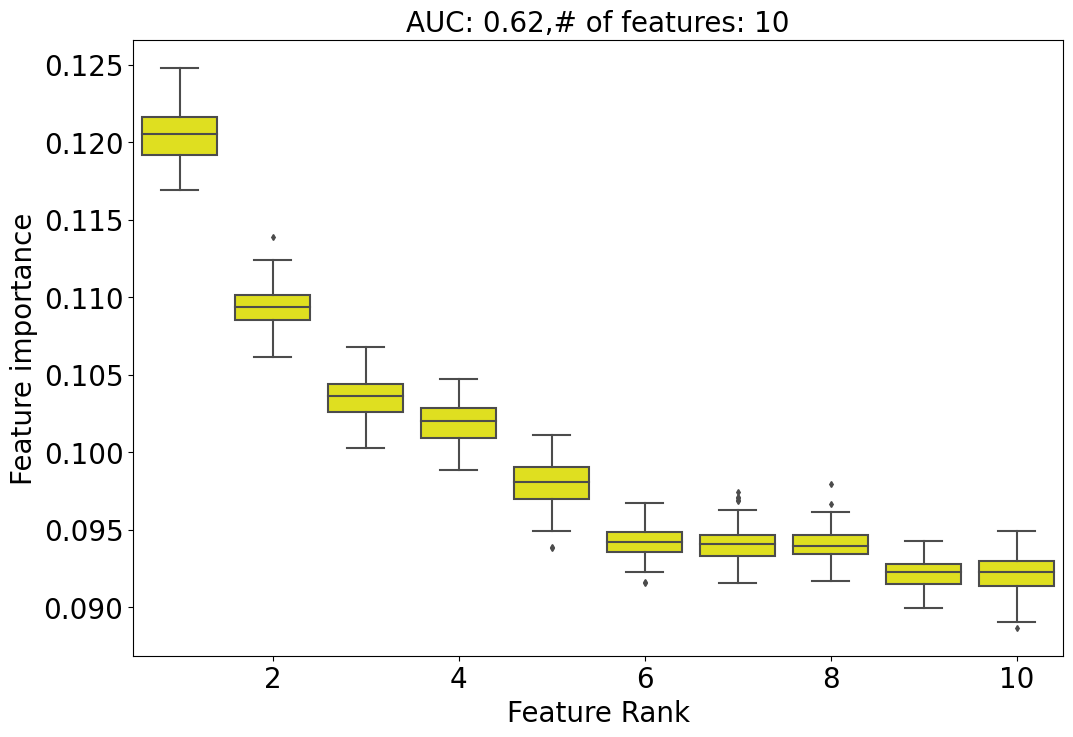

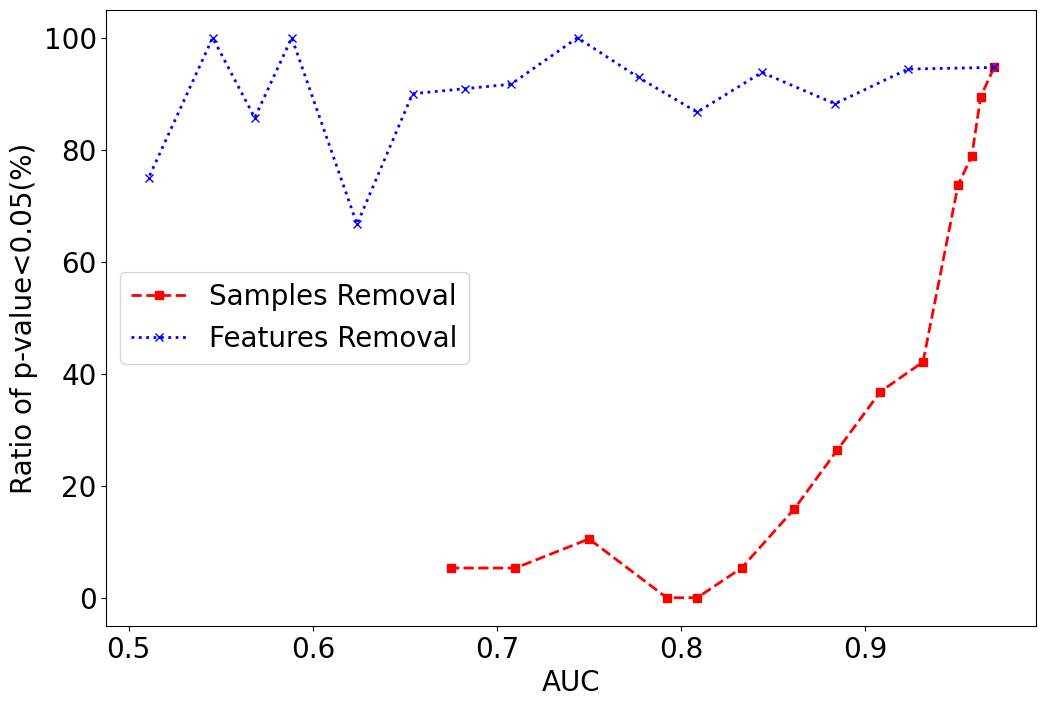

generated_1
94.7
generated_2


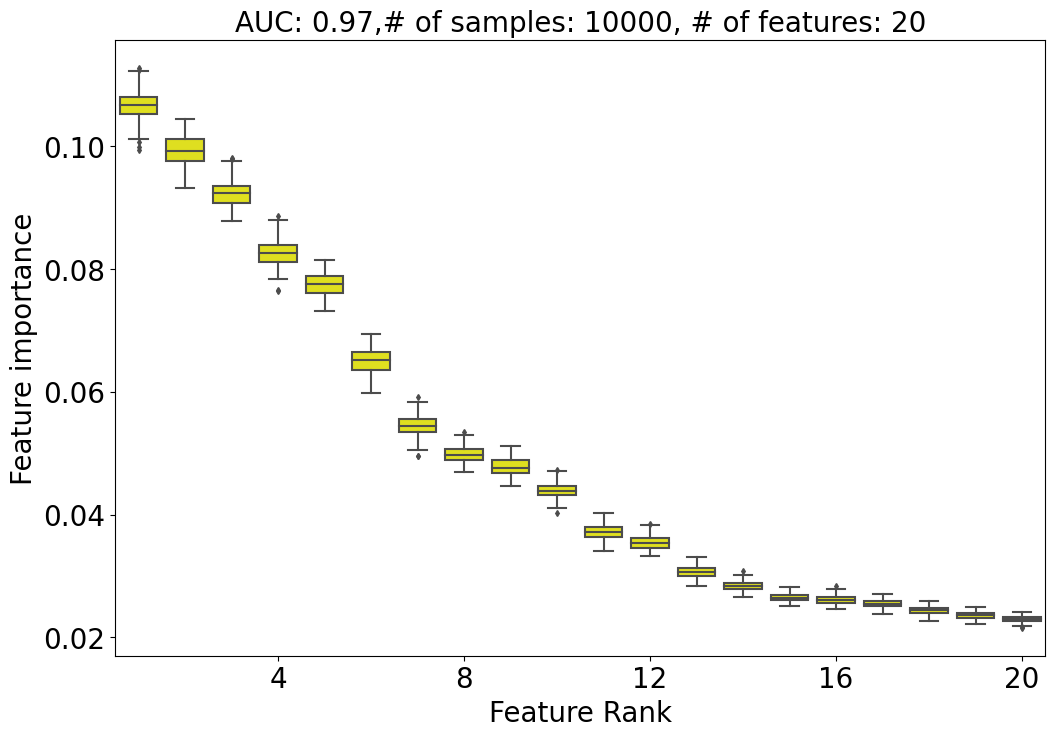

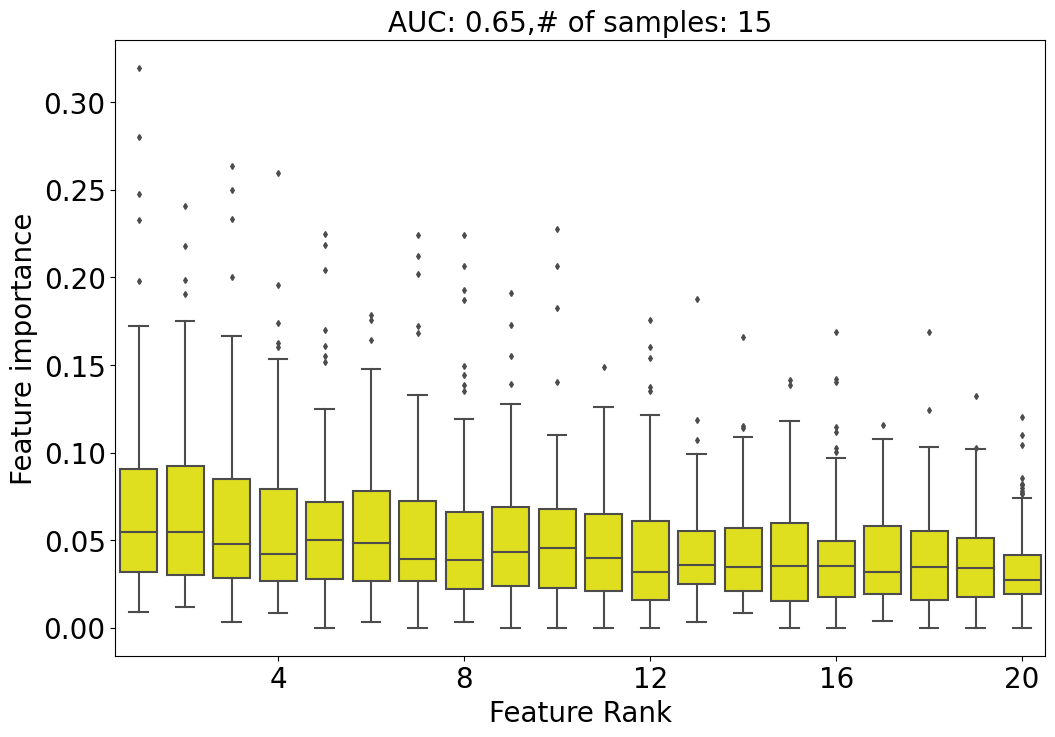

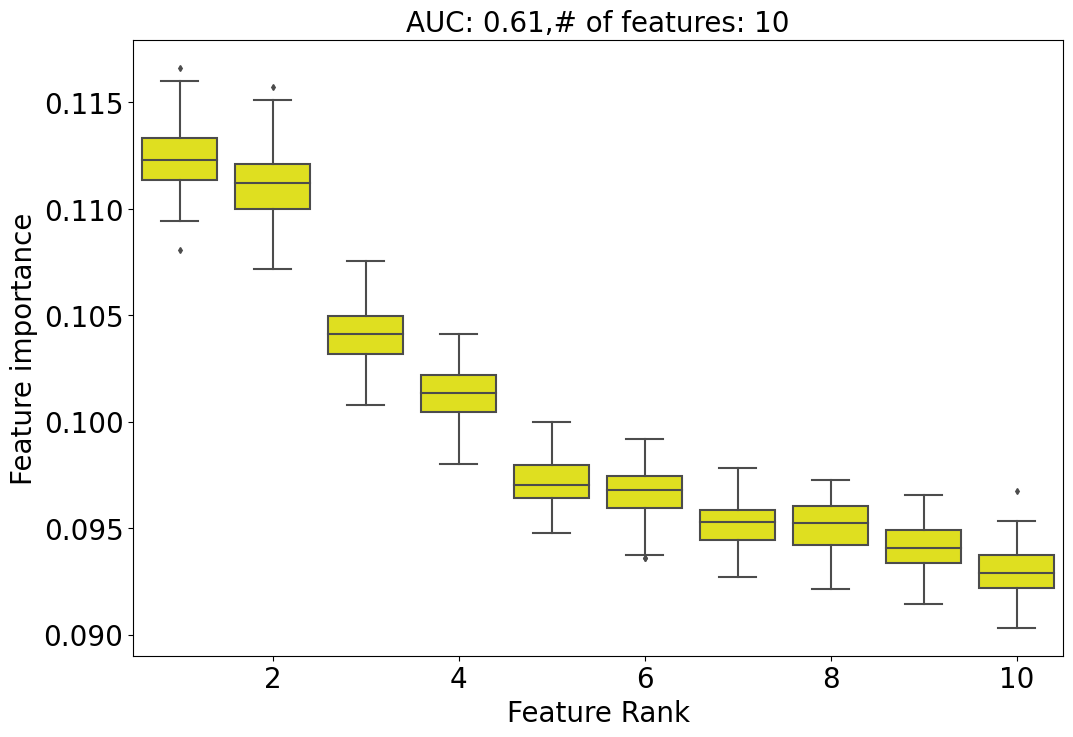

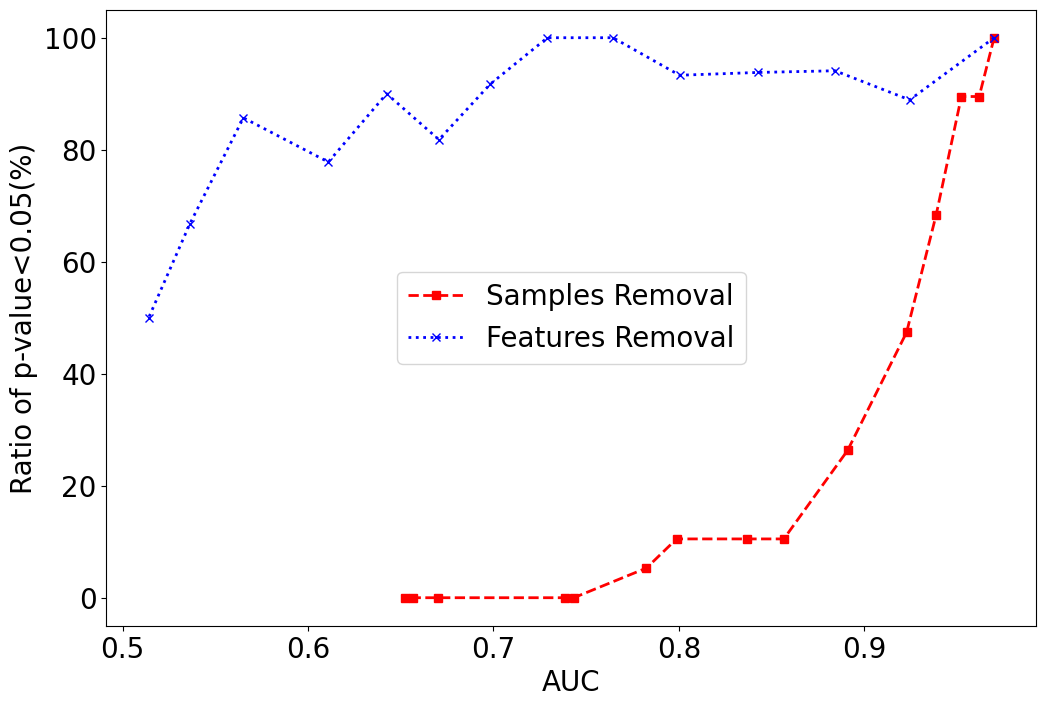

generated_2
100.0
generated_3


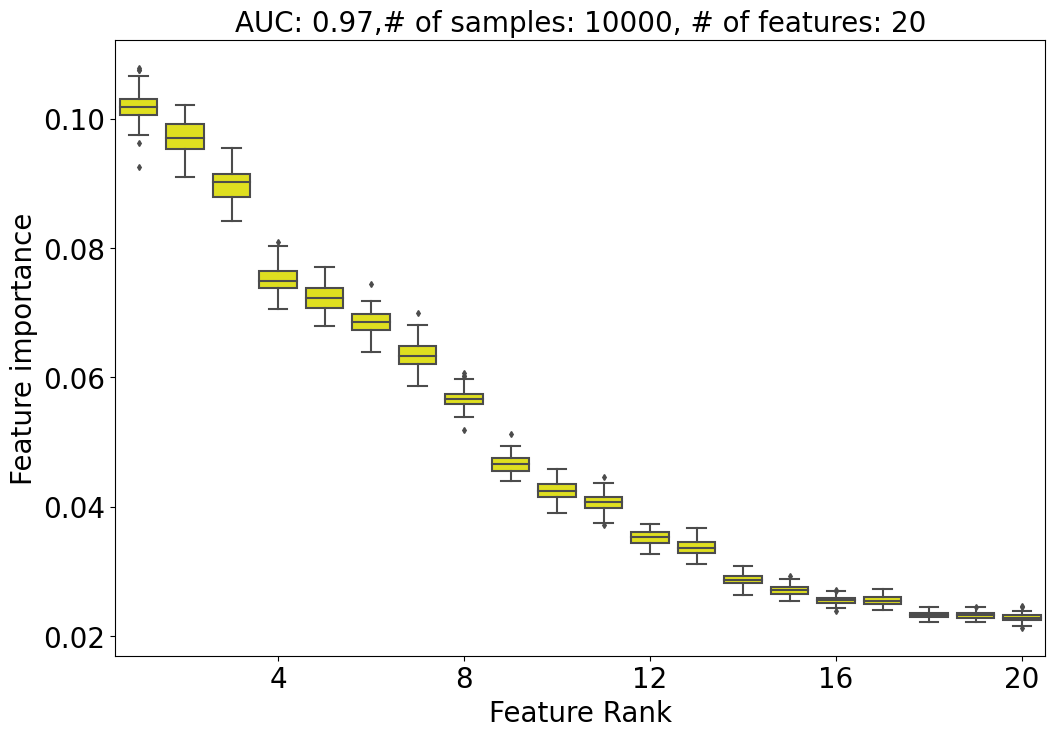

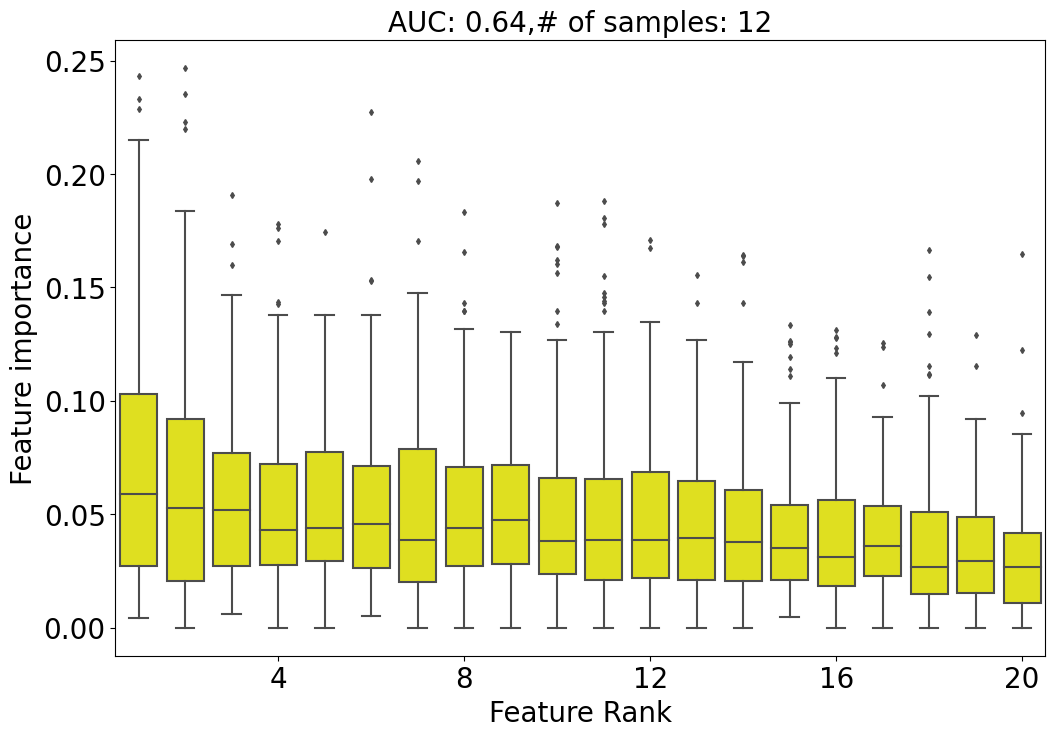

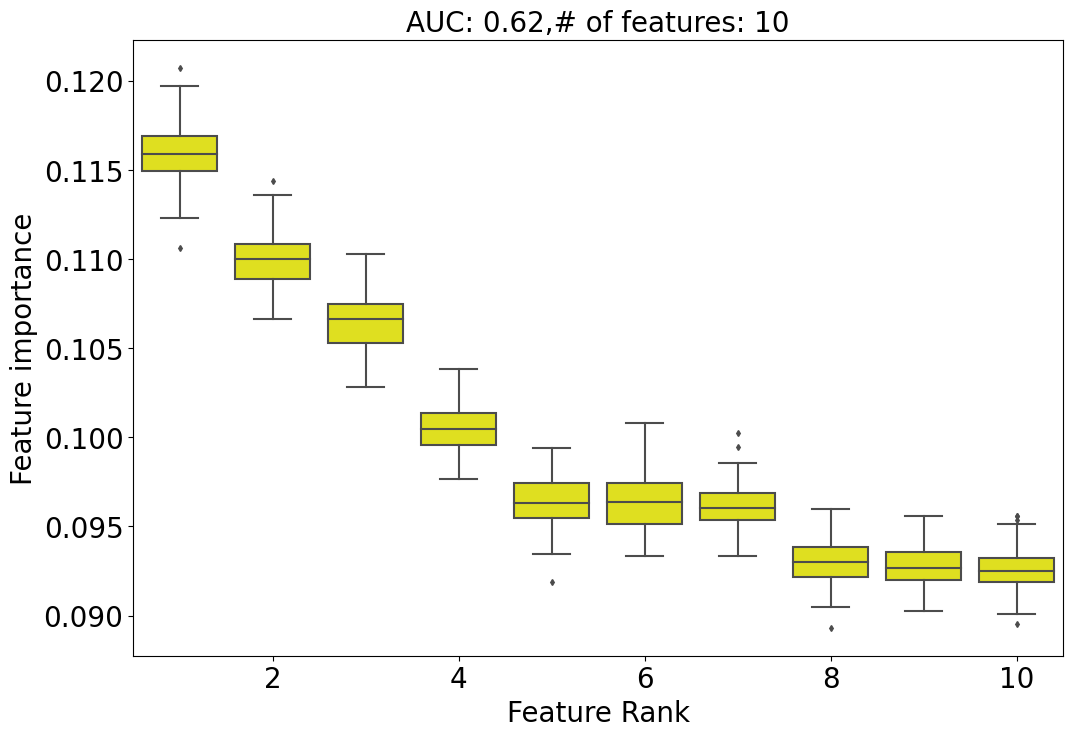

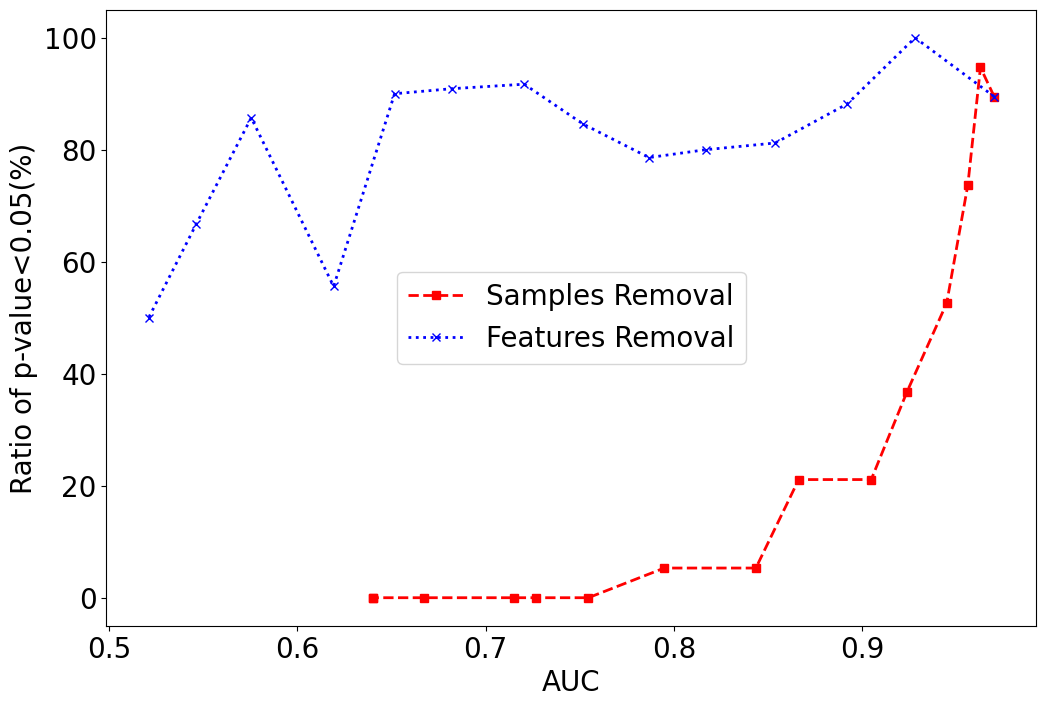

generated_3
89.5
real_1_DR


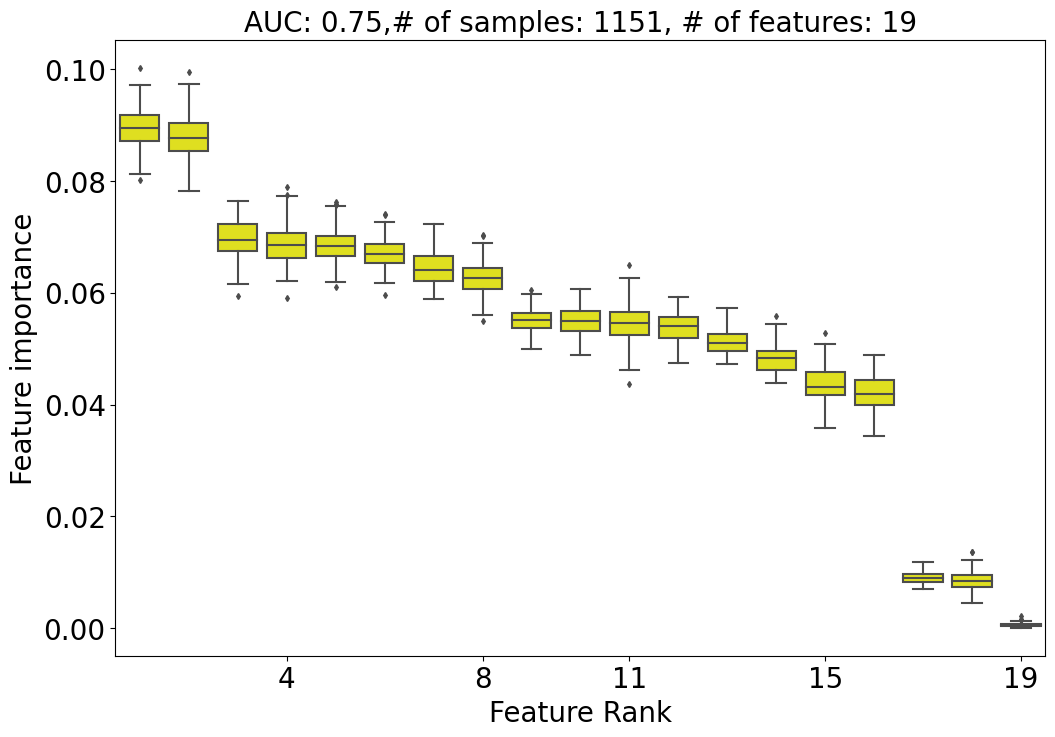

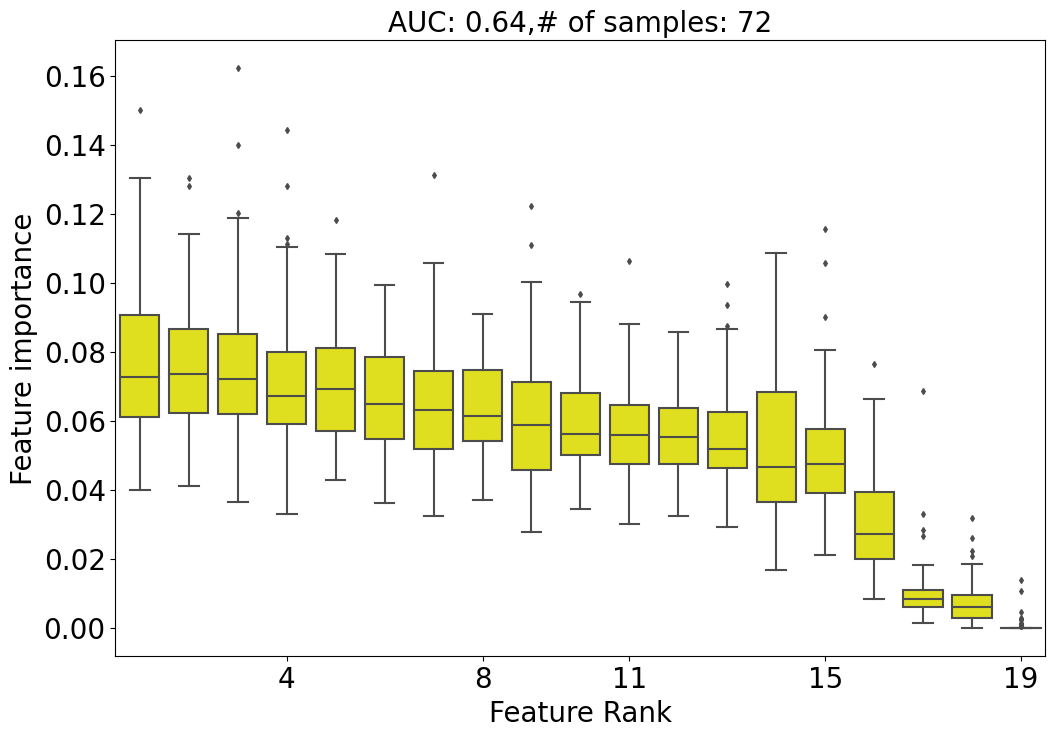

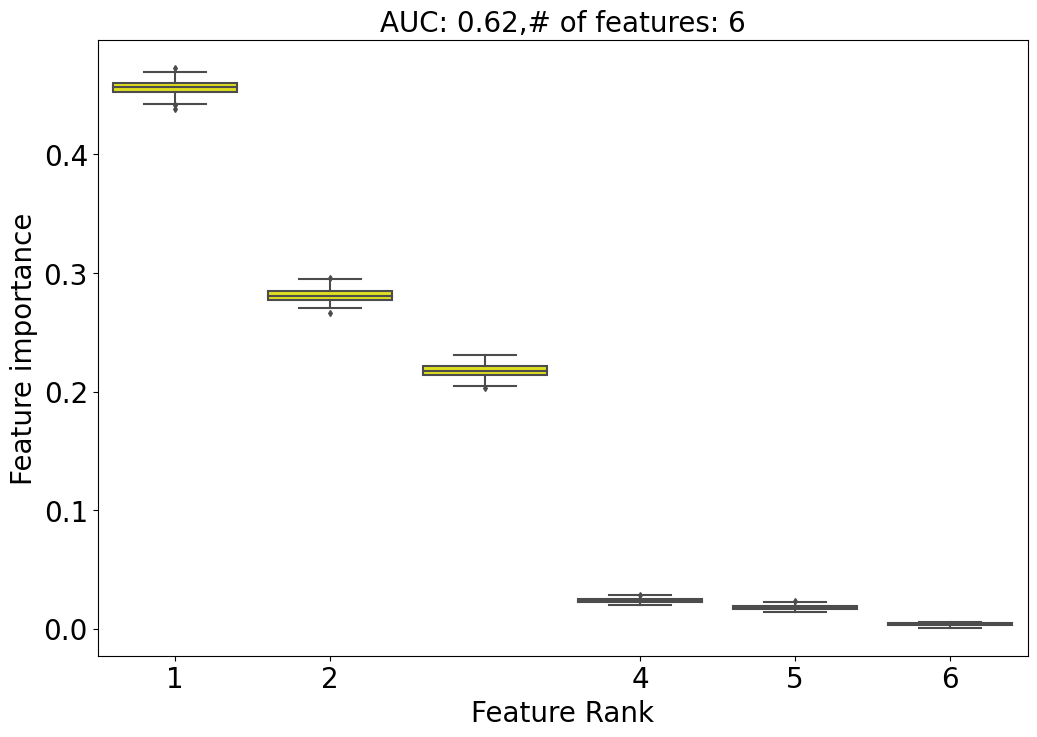

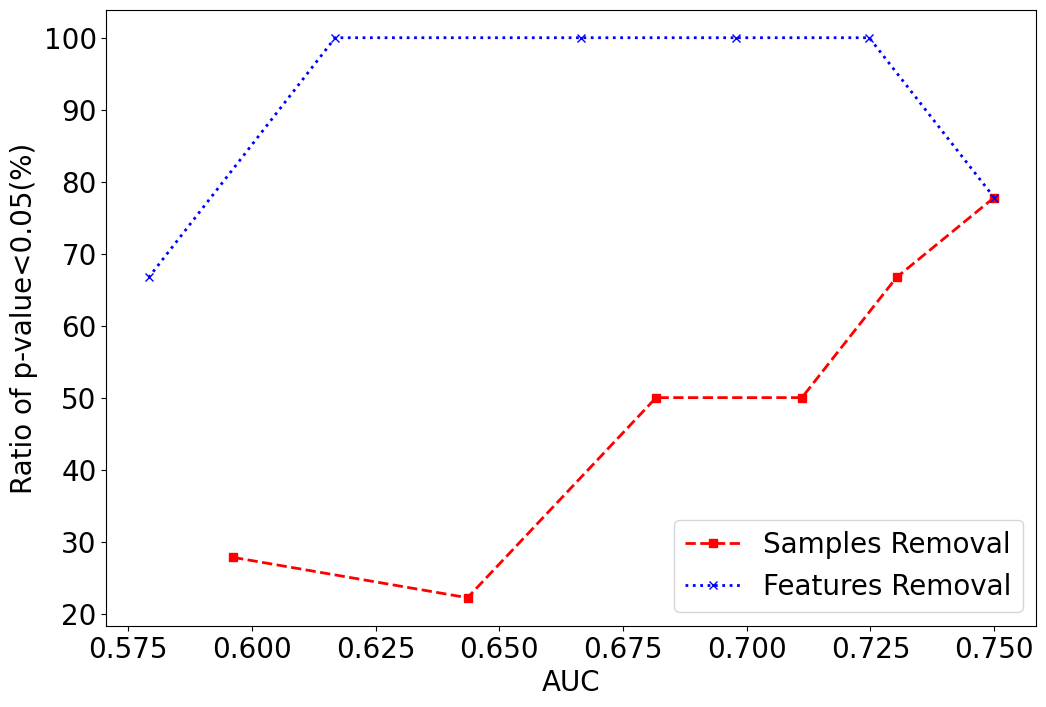

real_1_DR
77.8
real_2_TS


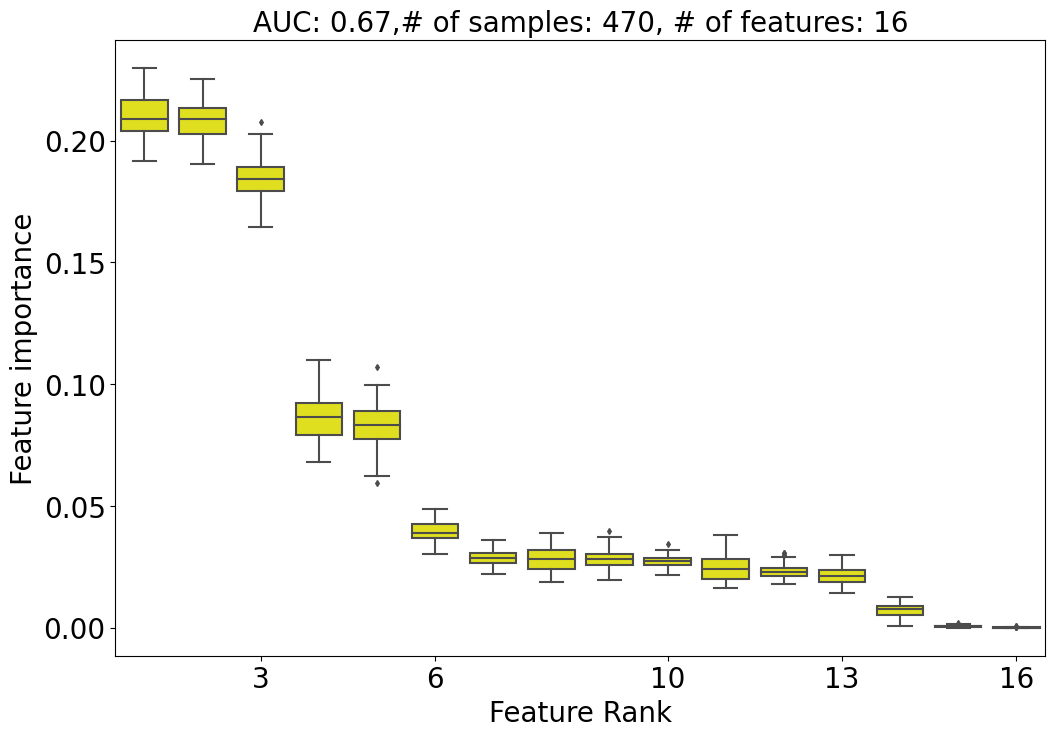

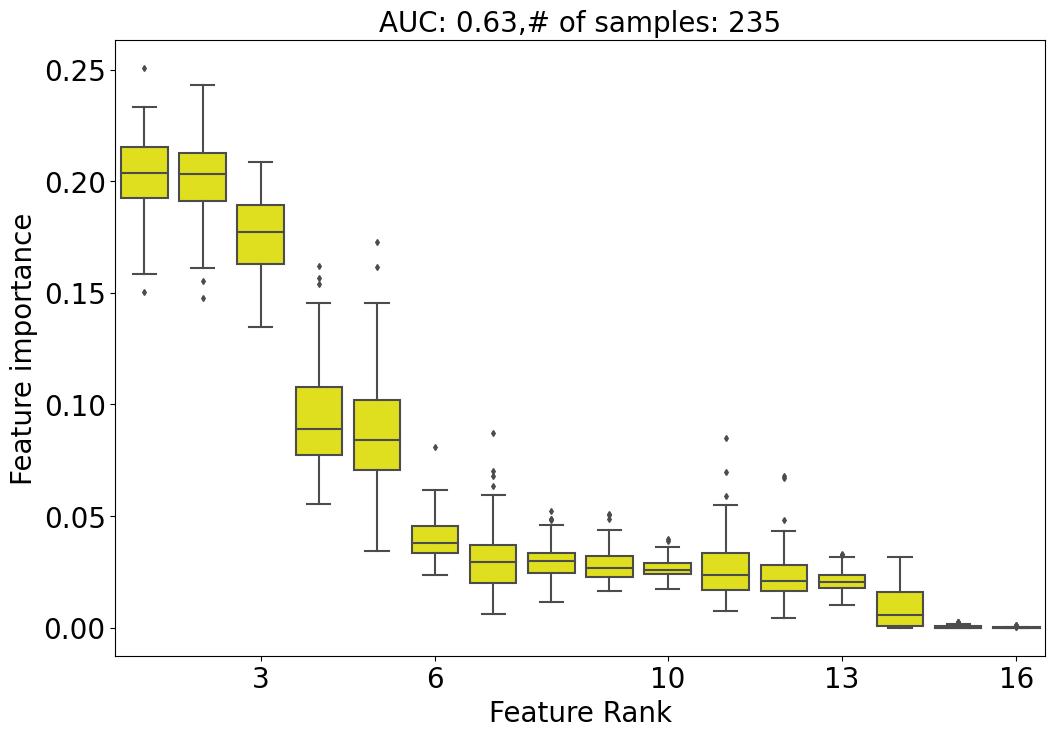

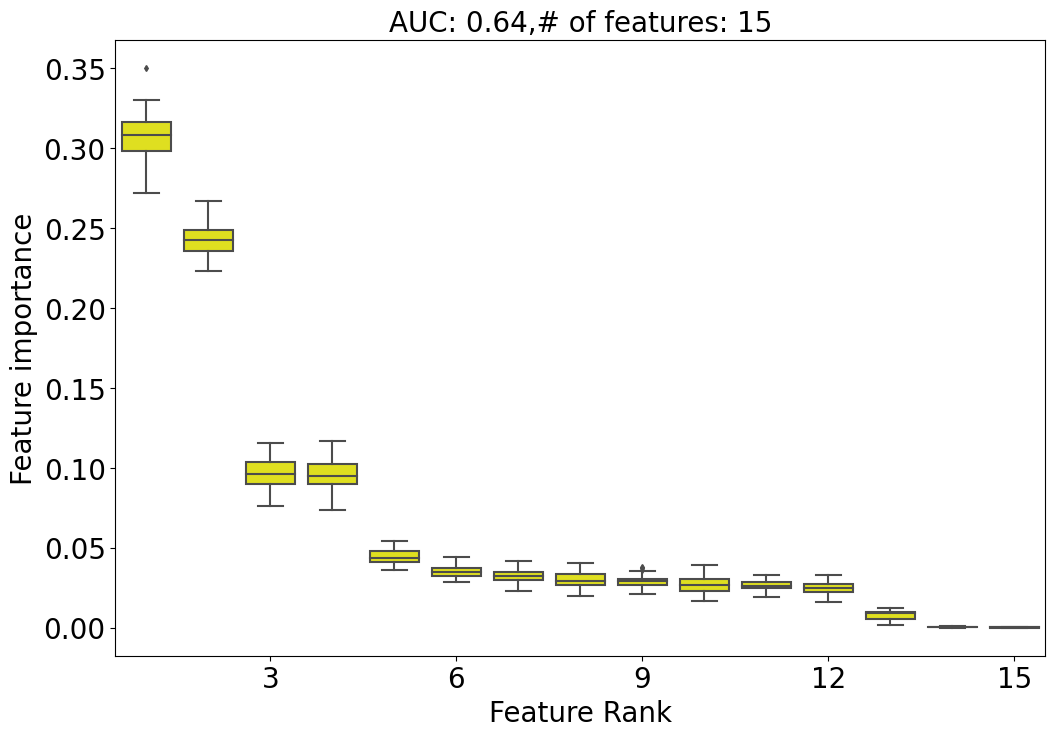

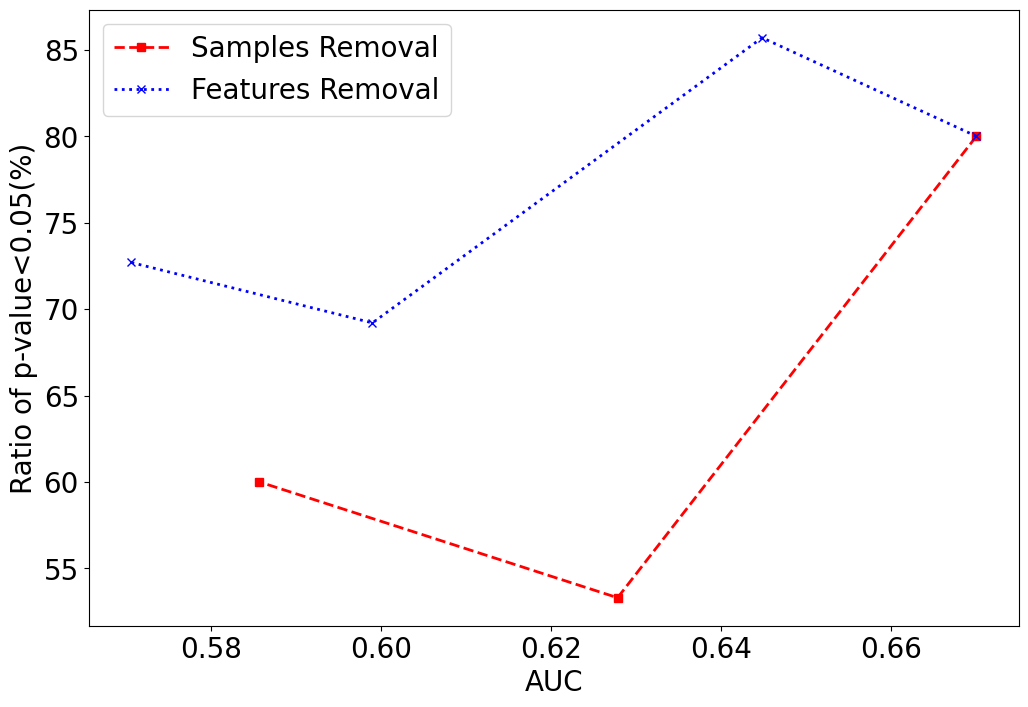

real_2_TS
80.0
real_3_HT


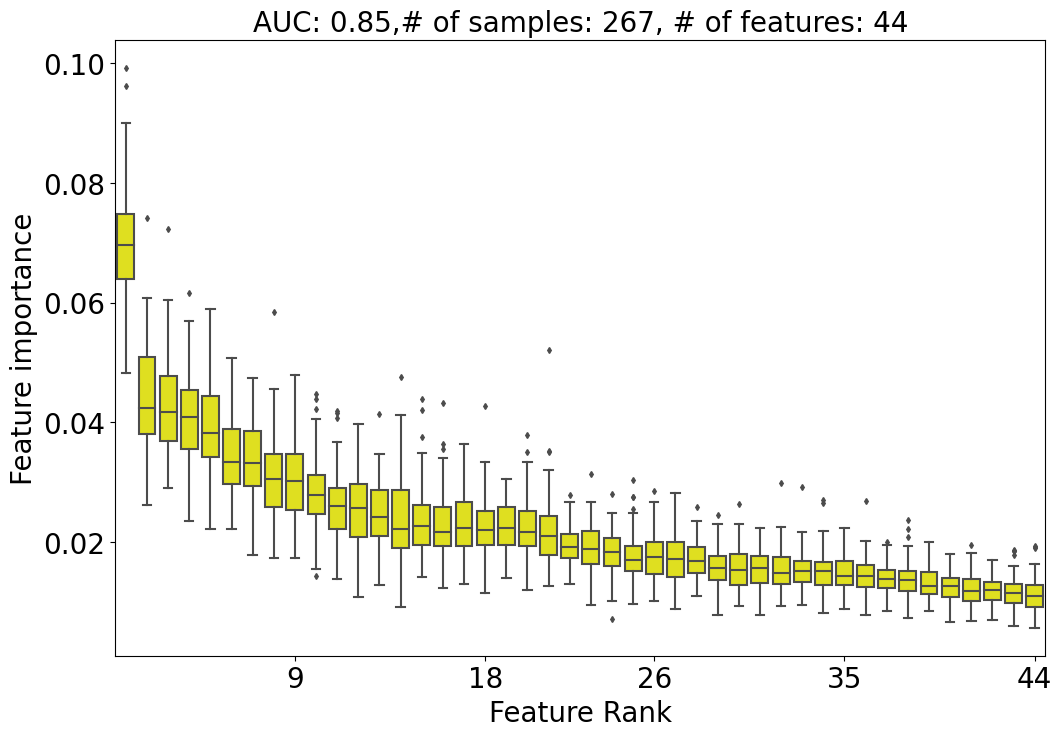

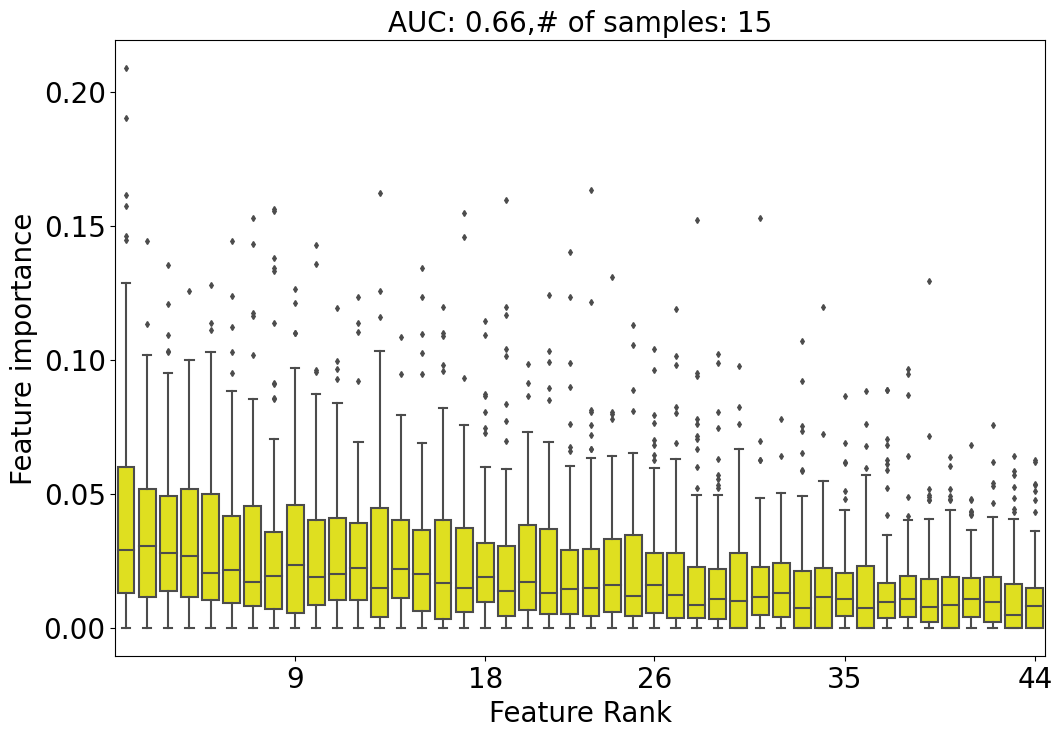

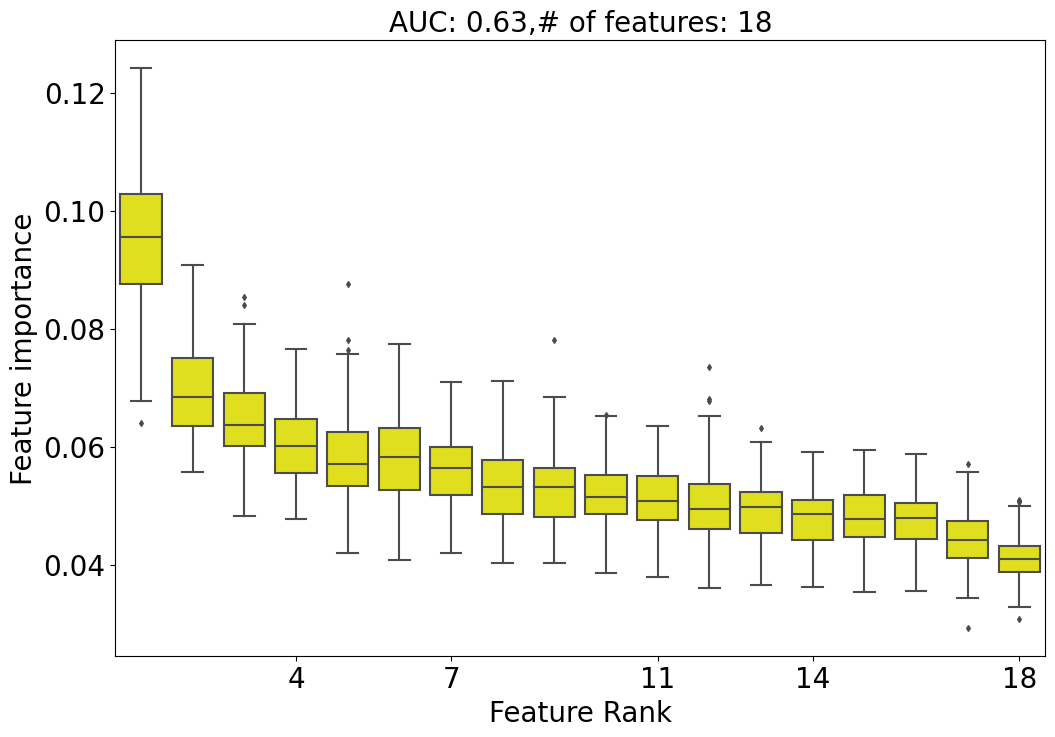

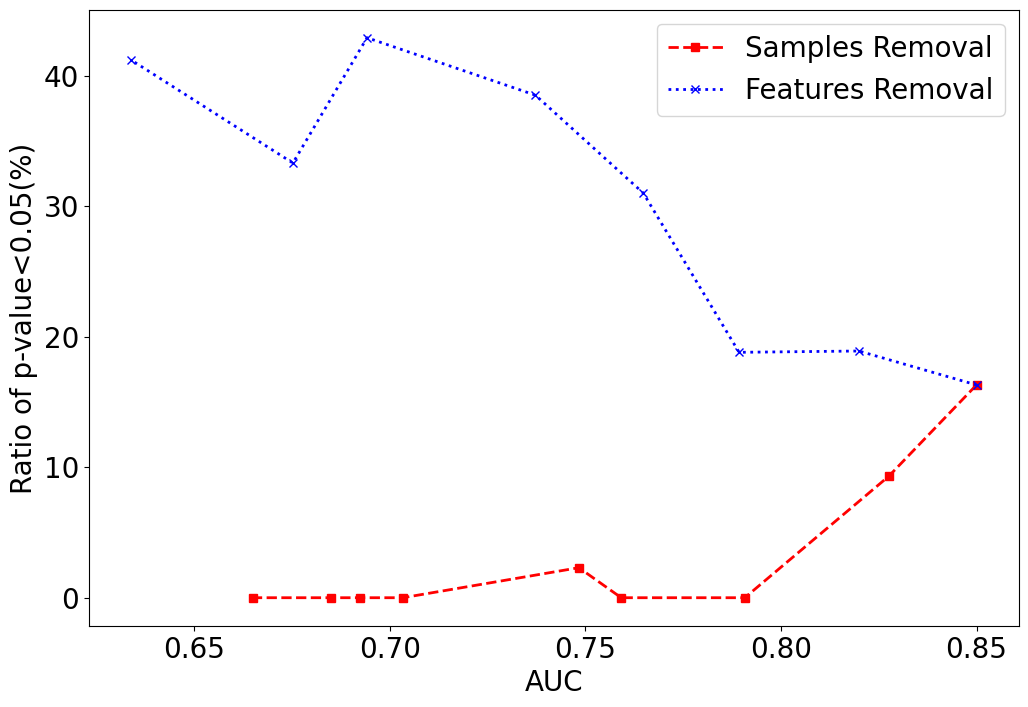

real_3_HT
16.3
real_4_MS


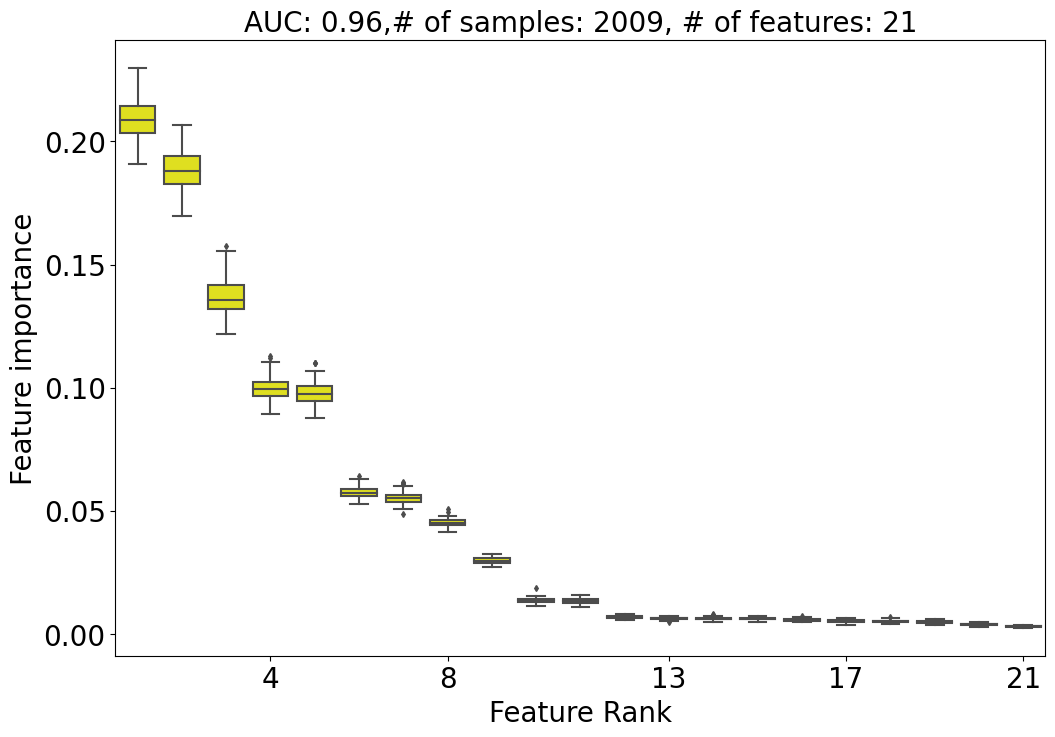

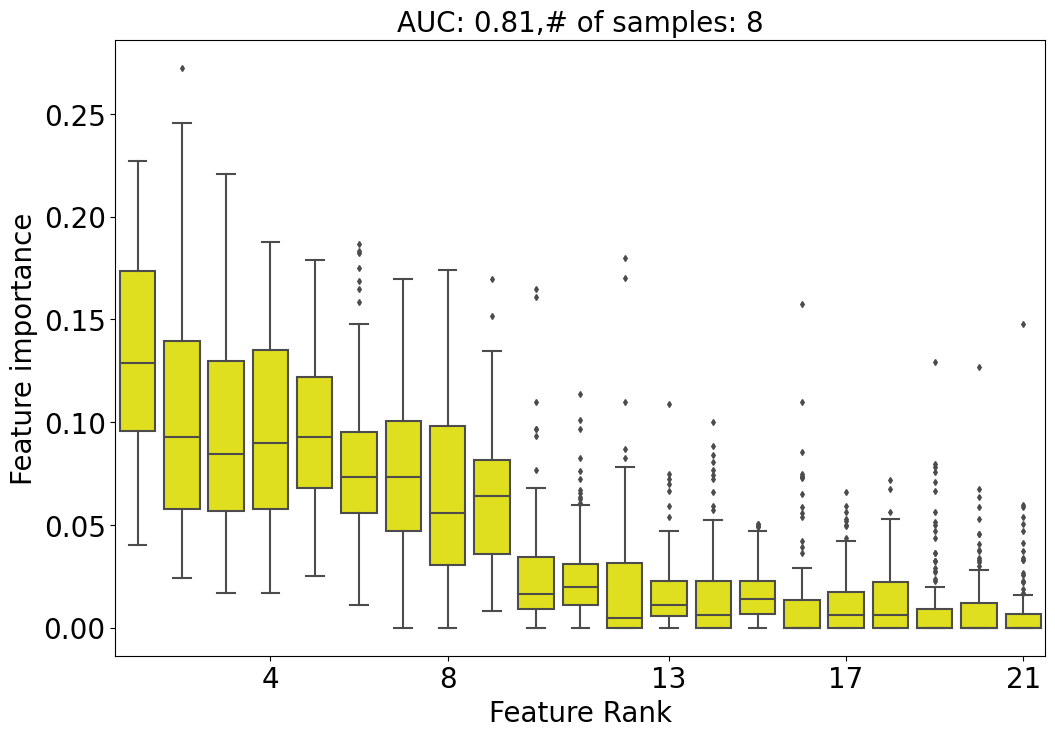

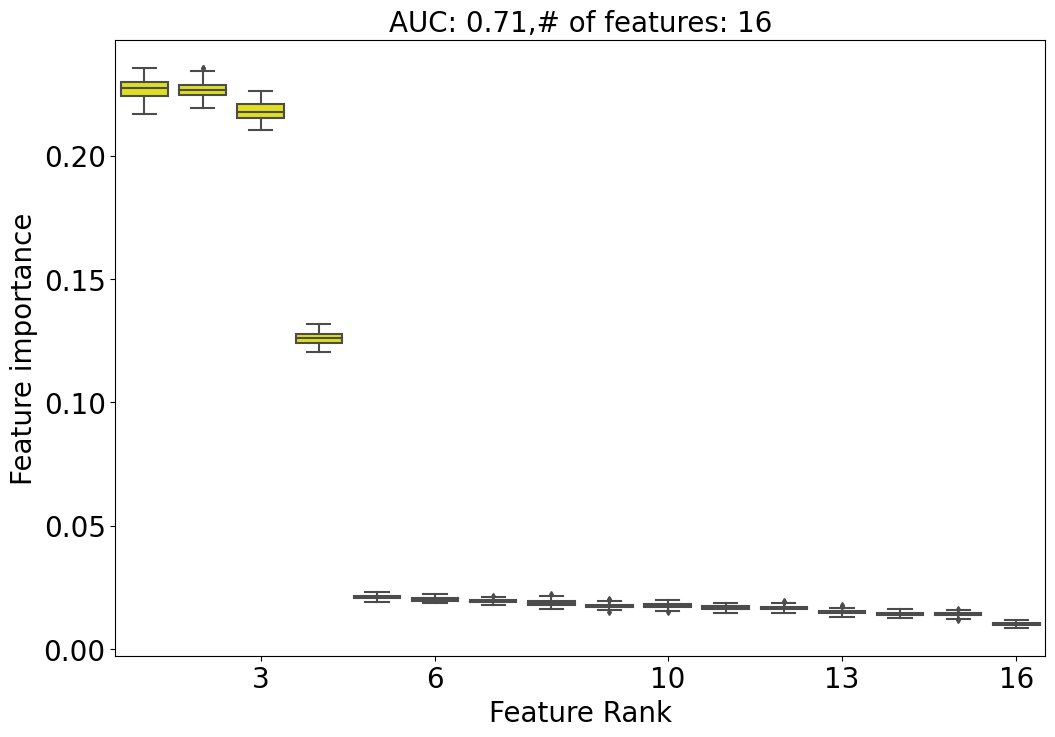

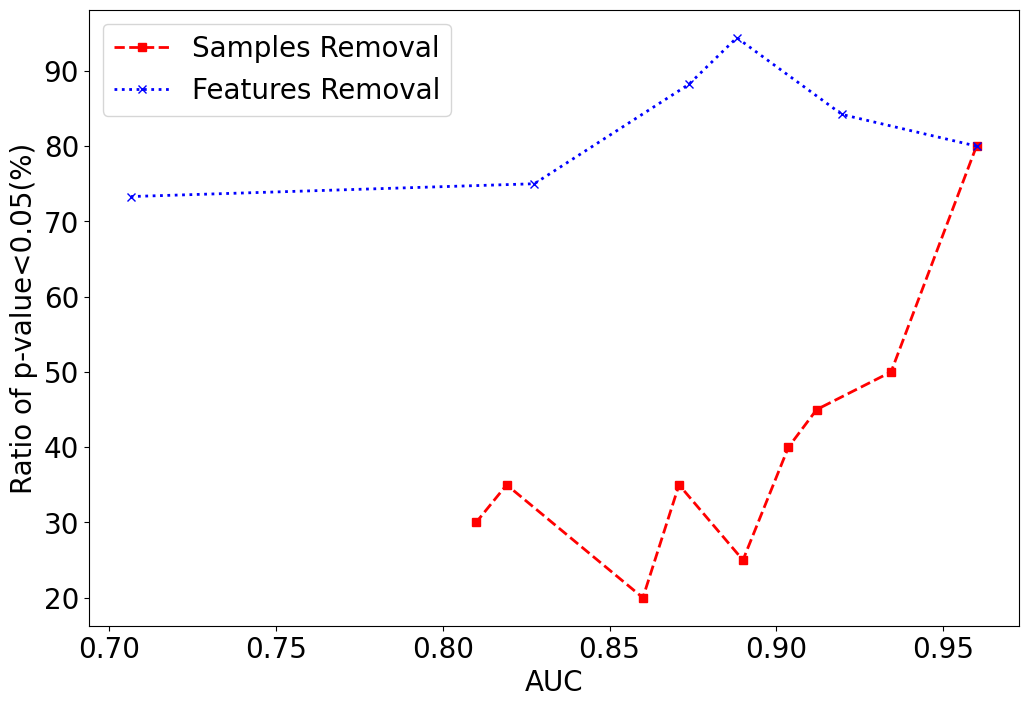

real_4_MS
80.0


In [6]:
cut_algorithm = ["data_cut","feature_cut"]


for loc_index,loc_folder in enumerate(list_data):
    
    if not "generated" in loc_folder and not "real" in loc_folder:
        continue
    print(loc_folder)
    
    try:
        os.mkdir("feature_distribution/%s"%loc_folder)
    except:
        pass

    
    
    # image file
    # generated -> best performing model's distribution
    # weak model:argmin(>0.6) 's distribution. 
            
    features = np.load("../dataset/3.preprocessed/"+loc_folder+"/features.npy")
    best_feature_importance = np.load("../result/"+loc_folder+"/feature_importance.npy")
    best_performance = np.round(np.average(np.load("../result/"+loc_folder+"/performance.npy")),2)
    

    target_feature_importance = best_feature_importance.copy()
    average_target = np.average(np.abs(target_feature_importance),axis=0)
    target_feature_importance = target_feature_importance[:,average_target.argsort()[::-1]]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=target_feature_importance, color='yellow',fliersize=3)
    feature_number_group_array= np.array([np.int(np.round(0.2*target_feature_importance.shape[1])),np.int(np.round(0.4*target_feature_importance.shape[1])),np.int(np.round(0.6*target_feature_importance.shape[1]))
                                          ,np.int(np.round(0.8*target_feature_importance.shape[1])),np.int(np.round(1*target_feature_importance.shape[1]))])
    plt.xticks(feature_number_group_array-1,feature_number_group_array,fontsize=20)
    plt.yticks(fontsize=20) 
    plt.xlabel("Feature Rank",fontsize=20)
    plt.ylabel("Feature importance",fontsize=20)
    plt.title("AUC: %s,# of samples: %s, # of features: %s"%(best_performance,features.shape[0],features.shape[1]),fontsize=20) 
    
    plt.savefig('feature_distribution/%s/best_model.jpg'%(loc_folder), dpi=600, bbox_inches='tight')
    plt.show()
    
       
        
        
        
        
    stability_data=np.load('trimmed_stability/%s/%s.npy'%(loc_folder,cut_algorithm[0])) 
    target_grid = np.argmin(stability_data[:,1]>0.6)-1
    grid_num =int(stability_data[:,0][target_grid])
    performance_worst =np.round(stability_data[:,1][target_grid],2)
    target_feature_importance = np.load("../result/"+loc_folder+"/"+"data_cut"+"/%s_feature_importance.npy"%grid_num)
    average_target = np.average(np.abs(target_feature_importance),axis=0)
    target_feature_importance = target_feature_importance[:,average_target.argsort()[::-1]]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=target_feature_importance, color='yellow',fliersize=3)
    feature_number_group_array= np.array([np.int(np.round(0.2*target_feature_importance.shape[1])),np.int(np.round(0.4*target_feature_importance.shape[1])),np.int(np.round(0.6*target_feature_importance.shape[1]))
                                          ,np.int(np.round(0.8*target_feature_importance.shape[1])),np.int(np.round(1*target_feature_importance.shape[1]))])
    plt.xticks(feature_number_group_array-1,feature_number_group_array,fontsize=20)
    plt.yticks(fontsize=20)   
    plt.xlabel("Feature Rank",fontsize=20)
    plt.ylabel("Feature importance",fontsize=20)
    plt.title("AUC: %s,# of samples: %s"%(performance_worst,grid_num),fontsize=20)
    plt.savefig('feature_distribution/%s/data_cut.jpg'%(loc_folder), dpi=600, bbox_inches='tight')
    plt.show()
    
    
    
    
    
    
    
    stability_feature=np.load('trimmed_stability/%s/%s.npy'%(loc_folder,cut_algorithm[1])) 
    target_grid = np.argmin(stability_feature[:,1]>0.6)-1
    grid_num =int(stability_feature[:,0][target_grid])
    performance_worst =np.round(stability_feature[:,1][target_grid],2)
    target_feature_importance = np.load("../result/"+loc_folder+"/"+"feature_cut"+"/%s_feature_importance.npy"%grid_num)
    average_target = np.average(np.abs(target_feature_importance),axis=0)
    target_feature_importance = target_feature_importance[:,average_target.argsort()[::-1]]
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=target_feature_importance, color='yellow',fliersize=3)
    feature_number_group_array= np.array([np.int(np.round(0.2*target_feature_importance.shape[1])),np.int(np.round(0.4*target_feature_importance.shape[1])),np.int(np.round(0.6*target_feature_importance.shape[1]))
                                          ,np.int(np.round(0.8*target_feature_importance.shape[1])),np.int(np.round(1*target_feature_importance.shape[1]))])
    plt.xticks(feature_number_group_array-1,feature_number_group_array,fontsize=20)
    plt.yticks(fontsize=20) 
    plt.xlabel("Feature Rank",fontsize=20)
    plt.ylabel("Feature importance",fontsize=20)
    plt.title("AUC: %s,# of features: %s"%(performance_worst,grid_num),fontsize=20)
    plt.savefig('feature_distribution/%s/feature_cut.jpg'%(loc_folder), dpi=600, bbox_inches='tight')
    plt.show()
    
    
    

    
    
    # pvalue between the rank-> percentage of p-value<0.05
    # x-axis AUC, y-axis percentage of p-value<0.05

    best_state_pvalue = pvalue_percentage(best_feature_importance) 
        
    fig, ax = plt.subplots(figsize=(12,8))
    
    pvalue_result = np.array([])
    for grid_index, grid_num in enumerate(stability_data[:,0]):    
        feature_importance = np.load("../result/"+loc_folder+"/"+"data_cut"+"/%s_feature_importance.npy"%int(grid_num))
        pvalue_result = np.append(pvalue_result,pvalue_percentage(feature_importance))
    
    

    plt.plot(np.append(best_performance,stability_data[:,1]),np.append(best_state_pvalue,pvalue_result), linestyle='--', marker='s', color='r',linewidth=2,label = "Samples Removal")

    pvalue_result = np.array([])
    for grid_index, grid_num in enumerate(stability_feature[:,0]):    
        feature_importance = np.load("../result/"+loc_folder+"/"+"feature_cut"+"/%s_feature_importance.npy"%int(grid_num))
        pvalue_result = np.append(pvalue_result,pvalue_percentage(feature_importance))
    plt.plot(np.append(best_performance,stability_feature[:,1]),np.append(best_state_pvalue,pvalue_result),linestyle='dotted',marker='x', color='b', linewidth=2,label = "Features Removal")

    plt.xlabel("AUC",fontsize=20)
    plt.ylabel("Ratio of p-value<0.05(%)",fontsize=20)
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=20) 
    plt.legend(fontsize=20)

    
    plt.savefig('feature_distribution/%s/pvalue_comparison.jpg'%(loc_folder), dpi=600, bbox_inches='tight')
    plt.show()

      
    
    print(loc_folder)
    
    print(pvalue_percentage(best_feature_importance))

# Code to draw Appendix 11

In [4]:
list_data

['.ipynb_checkpoints',
 'generated_1',
 'generated_2',
 'generated_3',
 'preprocessing.ipynb',
 'real_1_IBD',
 'real_2_DR',
 'real_3_HF',
 'real_4_TS',
 'real_5_HT',
 'real_6_BC']

In [6]:
target_feature_importance.shape

(100, 20)

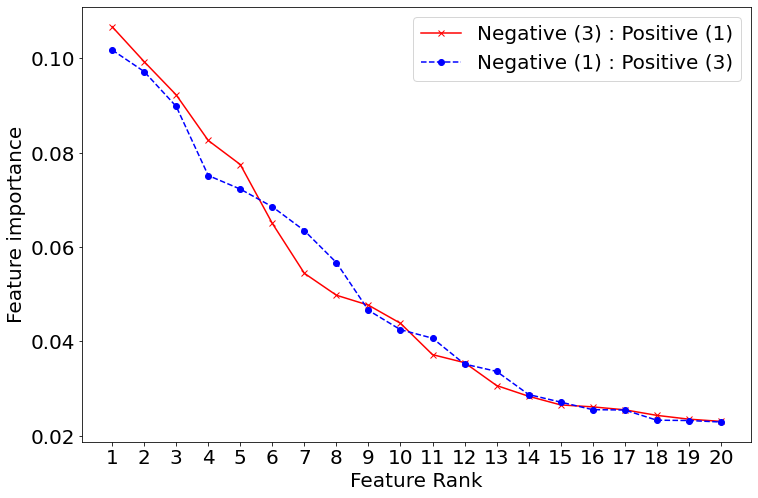

In [14]:

loc_folder = 'generated_2'

best_feature_importance = np.load("../result/"+loc_folder+"/feature_importance.npy")

target_feature_importance = best_feature_importance.copy()
average_target = np.average(np.abs(target_feature_importance),axis=0)
target_feature_importance = target_feature_importance[:,average_target.argsort()[::-1]]

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1,21),np.average(target_feature_importance,axis=0),linestyle='-', marker='x', color='r', label='Negative (3) : Positive (1)')




loc_folder = 'generated_3'

best_feature_importance = np.load("../result/"+loc_folder+"/feature_importance.npy")

target_feature_importance = best_feature_importance.copy()
average_target = np.average(np.abs(target_feature_importance),axis=0)
target_feature_importance = target_feature_importance[:,average_target.argsort()[::-1]]

plt.plot(np.arange(1,21),np.average(target_feature_importance,axis=0),linestyle='--', marker='o', color='b', label='Negative (1) : Positive (3)')







# sns.boxplot(data=target_feature_importance, color='yellow',fliersize=3)
# feature_number_group_array= np.array([np.int(np.round(0.2*target_feature_importance.shape[1])),np.int(np.round(0.4*target_feature_importance.shape[1])),np.int(np.round(0.6*target_feature_importance.shape[1]))
#                                       ,np.int(np.round(0.8*target_feature_importance.shape[1])),np.int(np.round(1*target_feature_importance.shape[1]))])





plt.xticks(np.arange(1,21),fontsize=20)
plt.yticks(fontsize=20) 
plt.xlabel("Feature Rank",fontsize=20)
plt.ylabel("Feature importance",fontsize=20)
plt.legend(fontsize=20)
# plt.title("AUC: %s,# of features: %s, # of features: %s"%(best_performance,features.shape[0],features.shape[1]),fontsize=20) 

plt.savefig('feature_distribution/generated2vs3(Appendix12).jpg', dpi=600, bbox_inches='tight')
plt.show()
    
       
        
        